<a href="https://colab.research.google.com/github/ESHAN99/WBC-CLASSIFICATION/blob/main/WBC_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report 

In [ ]:
train_dir = r'/content/drive/MyDrive/wbc_dataset_dip/train'
test_dir = r'/content/drive/MyDrive/wbc_dataset_dip/test'

**Loading Image Data**

In [ ]:
# creating generators
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)


test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
# flow image data
train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 2058 images belonging to 5 classes.
Found 511 images belonging to 5 classes.
Found 86 images belonging to 5 classes.


In [ ]:
train_images.next()[1]

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

**Build Pretrained Model**

In [ ]:
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


**Build Classification Model**

In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
device_name = tf.test.gpu_device_name()

In [ ]:
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Training**

In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
65/65 [==============================] - 218s 3s/step - loss: 0.1857 - accuracy: 0.9383 - val_loss: 0.1792 - val_accuracy: 0.9511
Epoch 2/100
65/65 [==============================] - 10s 156ms/step - loss: 0.1112 - accuracy: 0.9611 - val_loss: 0.1654 - val_accuracy: 0.9472
Epoch 3/100
65/65 [==============================] - 10s 156ms/step - loss: 0.0962 - accuracy: 0.9689 - val_loss: 0.1828 - val_accuracy: 0.9393
Epoch 4/100
65/65 [==============================] - 10s 156ms/step - loss: 0.0571 - accuracy: 0.9854 - val_loss: 0.1672 - val_accuracy: 0.9491
Epoch 5/100
65/65 [==============================] - 10s 158ms/step - loss: 0.0366 - accuracy: 0.9932 - val_loss: 0.1477 - val_accuracy: 0.9511
Epoch 6/100
65/65 [==============================] - 10s 154ms/step - loss: 0.0364 - accuracy: 0.9917 - val_loss: 0.1641 - val_accuracy: 0.9628
Epoch 7/100
65/65 [==============================] - 10s 152ms/step - loss: 0.0223 - accuracy: 0.9971 - val_loss: 0.1488 - val_accuracy: 0

In [ ]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Overtime"
)
fig.show()

In [ ]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['basophil', 'eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']

Test Accuracy: 94.186%


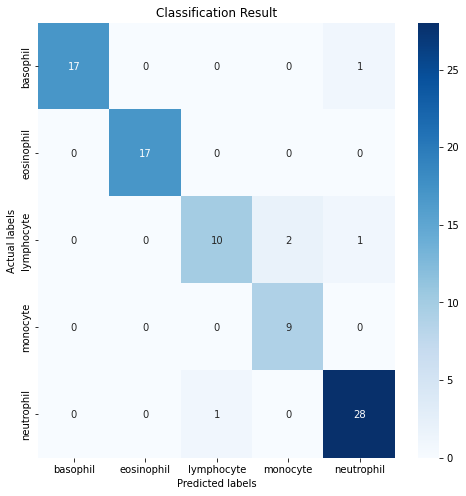

Classification Report:
----------------------
               precision    recall  f1-score   support

    basophil       1.00      0.94      0.97        18
  eosinophil       1.00      1.00      1.00        17
  lymphocyte       0.91      0.77      0.83        13
    monocyte       0.82      1.00      0.90         9
  neutrophil       0.93      0.97      0.95        29

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.94      0.94      0.94        86



In [ ]:
predictions = np.argmax(model.predict(test_images), axis=1)

acc = accuracy_score(test_images.labels, predictions)
cm = tf.math.confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names = CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=True)
plt.xticks(ticks=np.arange(5) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(5) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Classification Result")
plt.show()

print("Classification Report:\n----------------------\n", clr)